> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-Show Appointments Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 > This report investigates the No-Show appointment dataset, The dataset collects information from 100k medical appointments in Brazil. The aim of the report is to question whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.



### Dataset Description
  > . ScheduledDay: Tells us on what day the patient set up their appiontment.
 
  > . AppiontmentDay: Tells us on what day the patient is expected to show up for their appiontment.
 
  > . Gender: Indicates the sex of the patient.
 
  > . Neighborhood: Indicates the location of the hospital.
 
  > . Scholarship: Indicates whether or not the patient is enrolled in the Brasilian welfare program.
 
  > . No-Show: Indicates 'Yes' for a no-show, and 'No' for a patient who showed up. 

   




### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> 1. What factors influences a patient to show up or not for their scheduled appointment?

> 2. Does sending SMS as a reminder help to reduce the rate of No-Show?

> 3. Are No-Show more frequent on a particular weekday?


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Read the dataset 
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# show the summary for all columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# get the dataset dimensions
df.shape

(110527, 14)

In [5]:
# check for unique value in columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
# get the datatypes of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for columns with missing value
df.isnull().sum().any()

False

In [10]:
# check for rows with missing value
df.isna().any(axis=1).sum()

0

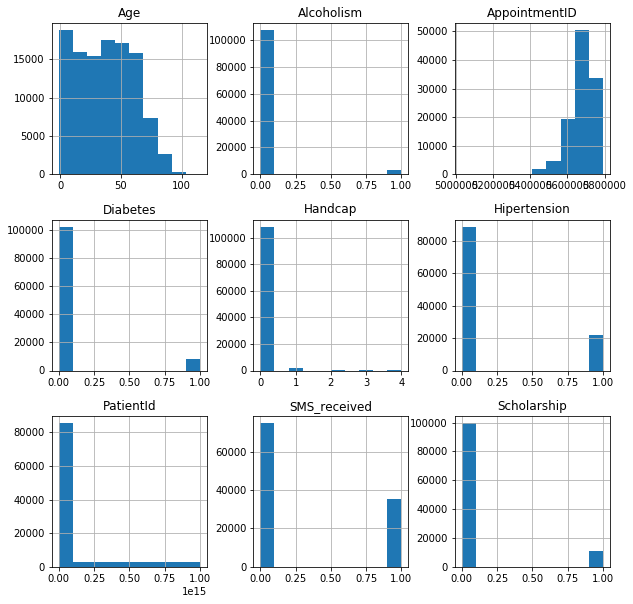

In [11]:
# visualizing the dataframe
df.hist(figsize=(10,10));

    There are zero(0) duplicate in the dataframe.
    There are False missing value in columns.
    And there are zero(0) missing value in all rows. 

In [12]:
# counting numbers of handicap
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [13]:
# counting Age
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [14]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

    Let's rename No-show and SMS_received columns to be consistent.
    We'll not be interested in AppointmentID in our analysis, so we are dropping it in the cleaning section below.
    Let's also change Noshow datatype to boolean .
    Let's also change the Age value with -1.
    And we'll also rename some mistyped column names such as Handcap and Hipertension.


# Data Cleaning
 

In [15]:
# dropping AppointmentID column
df.drop(['AppointmentID'], axis = 1, inplace = True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# renaming mistyped columns
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'SMSreceived', 'No-show':'NoShow'}, inplace=True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


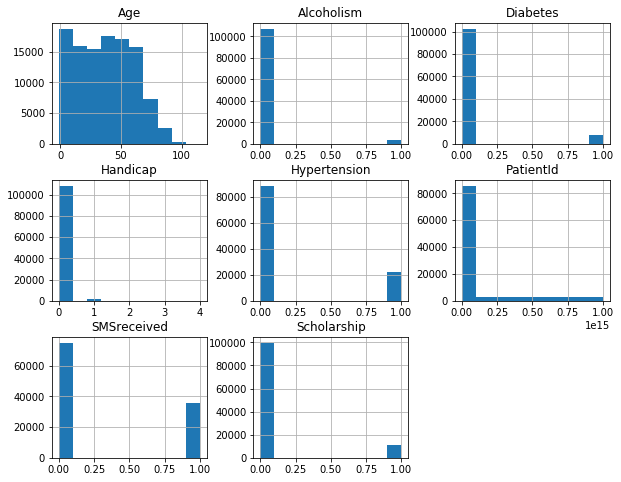

In [17]:
# checking for differences in general hist and after dropping ID
df.hist(figsize=(10, 8));

In [18]:
# confirming after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSreceived       110527 non-null int64
NoShow            110527 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


In [19]:
# checking for any duplicate after dropping 
df.duplicated().sum()
df.drop_duplicates()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [20]:
# replacing Age value 
df['Age'].replace(-1,0, inplace=True)

In [21]:
# counting Age value
df['Age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [22]:
# replacing NoShow value
df['NoShow'].replace({'Yes': 1, 'No': 0 }, inplace=True)

In [23]:
# confirming
df

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336882e+14,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639473e+13,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0


In [24]:
# changing data type
df['NoShow'] = df['NoShow'].astype('bool')

In [25]:
# confirming
df.dtypes

PatientId         float64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMSreceived         int64
NoShow               bool
dtype: object

    Can't visualize Scholarship, Hypertension, Alcoholism, SMSreceived and Diabetes columns because they show a NAN values, so let's change their datatypes.
    Let's change Neighbourhood, Handicap, and Gender to categorical data.
    Let's also make AppointmentDay and ScheduledDay into datetime.

In [26]:
# changing columns datatypes to boolean
for c in ['Scholarship', 'Alcoholism', 'Hypertension', 'SMSreceived', 'Diabetes']:
    df[c] = df[c].astype('bool')

In [27]:
# changing to category
for c in ['Handicap', 'Gender', 'Neighbourhood']:
    df[c] = df[c].astype('category')

In [28]:
# changing to datetime
for c in ['AppointmentDay', 'ScheduledDay']:
    df[c] = pd.to_datetime(df[c])


In [29]:
# confirming change
df.dtypes

PatientId                float64
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood           category
Scholarship                 bool
Hypertension                bool
Diabetes                    bool
Alcoholism                  bool
Handicap                category
SMSreceived                 bool
NoShow                      bool
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Replace this header name!)

In [30]:
# checking for correlation between variables
df.corr('spearman').style.background_gradient(cmap="Blues")

,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSreceived,NoShow
PatientId,1,-0.00166901,-0.000544955,0.00236915,0.00635885,0.00788945,-0.0082618,-0.000711497
Age,-0.00166901,1,-0.0900988,0.503204,0.29332,0.102266,0.0153892,-0.0612281
Scholarship,-0.000544955,-0.0900988,1,-0.0197288,-0.0248935,0.0350225,0.00119401,0.029135
Hypertension,0.00236915,0.503204,-0.0197288,1,0.433086,0.0879708,-0.00626686,-0.0357012
Diabetes,0.00635885,0.29332,-0.0248935,0.433086,1,0.0184735,-0.01455,-0.0151799
Alcoholism,0.00788945,0.102266,0.0350225,0.0879708,0.0184735,1,-0.0261474,-0.000196044
SMSreceived,-0.0082618,0.0153892,0.00119401,-0.00626686,-0.01455,-0.0261474,1,0.126431
NoShow,-0.000711497,-0.0612281,0.029135,-0.0357012,-0.0151799,-0.000196044,0.126431,1


In [31]:
# defining the dataframe of Gender
x=df["Gender"].value_counts()

([<matplotlib.patches.Wedge at 0x7f90cc081438>,
 [Text(-0.499318,0.980143,'Female'), Text(0.499318,-0.980143,'Male')],
 [Text(-0.272356,0.534624,'65%'), Text(0.272355,-0.534624,'35%')])

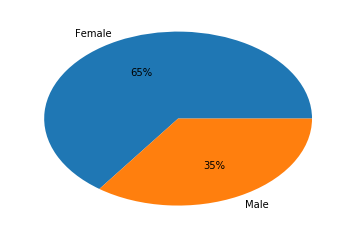

In [32]:
# visualizing Gender in percentage
plt.pie(x, labels=["Female", "Male"],autopct='%1.0f%%')

In [33]:
# defining NoShow that are true
noshow = df[df['NoShow'] == True ]

In [34]:
# checking the lenght
len(noshow)

22319

In [35]:
# defining NoShow that are false
show = df[df['NoShow'] == False ]

In [36]:
# checkimg the lenght
len(show)

88208

In [37]:
# confirming
show

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,NoShow
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False
5,9.598513e+13,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,0,False,False
8,5.639473e+13,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,0,False,False
9,7.812456e+13,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,0,False,False
10,7.345362e+14,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,False,False,False,False,0,False,False
12,5.666548e+14,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,True,False,False,False,0,False,False


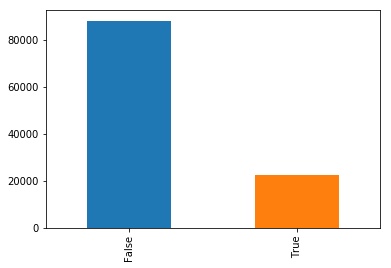

In [38]:
# visualizing NoShow Dataframe
df['NoShow'].value_counts().plot.bar()

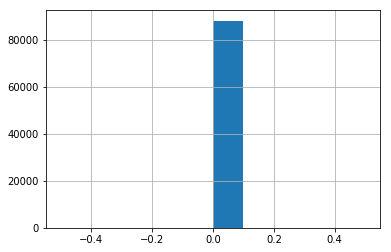

In [39]:
# defining show in 'NoShow' dataframe
x=show['NoShow']
x.hist()

    There about 22319 patients who didn't showup for their Appointments, while about 88000 plus showedup for their appointments.

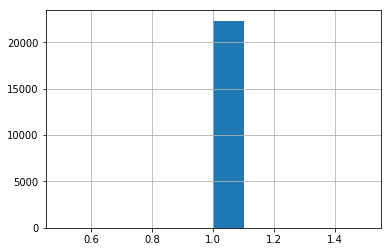

In [40]:
# visualizing noshow in 'NoShow' dataframe
x=noshow['NoShow']
x.hist()

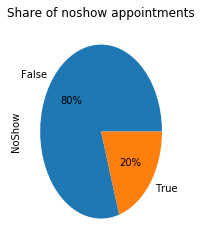

In [41]:
# checking for the share of NoShows in appointments
plt.subplot(1,2,2)
df.NoShow.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Share of noshow appointments')
plt.show()

In [42]:
# counting Diabetes 
df["Diabetes"].value_counts()

False    102584
True       7943
Name: Diabetes, dtype: int64

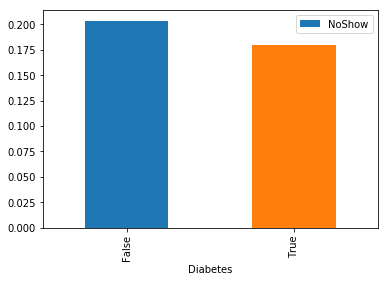

In [43]:
# checking for Diabetes in NoShow
df.groupby('Diabetes').NoShow.mean().plot(kind= 'bar')
plt.legend()

In [44]:
# checking for Scholarship mean in NoShow
df.groupby('Scholarship').NoShow.mean()

Scholarship
False    0.198072
True     0.237363
Name: NoShow, dtype: float64

False    99666
True     10861
Name: Scholarship, dtype: int64

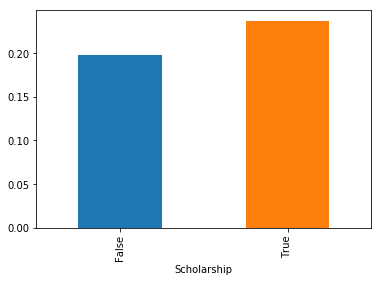

In [45]:
# visualizing Scholarship in NoShow
df.groupby('Scholarship').NoShow.mean().plot(kind= 'bar');
df.Scholarship.value_counts()

In [46]:
# counting Hypertension
df["Hypertension"].value_counts()

False    88726
True     21801
Name: Hypertension, dtype: int64

In [47]:
# checking for Age mean
df2 = df["Age"].mean()
print(df2)

37.0888832593


False    107167
True       3360
Name: Alcoholism, dtype: int64

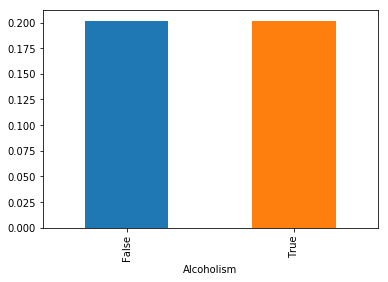

In [48]:
# checing for share of Alcoholism in NoShow
df.groupby('Alcoholism').NoShow.mean().plot(kind= 'bar');
df.Alcoholism.value_counts()

In [49]:
# checking for Diabetes by Age
df['Diabetes'].groupby(df['Age']).mean()


Age
0      0.000000
1      0.000440
2      0.000618
3      0.000000
4      0.000770
5      0.000000
6      0.000000
7      0.002102
8      0.000000
9      0.001458
10     0.002355
11     0.002510
12     0.004579
13     0.000000
14     0.000000
15     0.002477
16     0.014265
17     0.005964
18     0.000000
19     0.003236
20     0.003479
21     0.006887
22     0.004360
23     0.004448
24     0.006441
25     0.007508
26     0.010133
27     0.006536
28     0.007597
29     0.012117
         ...   
73     0.240000
74     0.285714
75     0.262868
76     0.215412
77     0.259962
78     0.225508
79     0.220513
80     0.238748
81     0.311060
82     0.227041
83     0.164286
84     0.135048
85     0.214545
86     0.184615
87     0.195652
88     0.230159
89     0.260116
90     0.229358
91     0.151515
92     0.046512
93     0.056604
94     0.151515
95     0.166667
96     0.117647
97     0.090909
98     0.333333
99     1.000000
100    0.000000
102    0.000000
115    0.000000
Name: Diabetes, Leng

In [50]:
# checking for NoShow mean
df2 = df["NoShow"].mean()
print(df2)

0.201932559465


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])